# Goodreads Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

**About Dataset**
**Context**
The primary reason for creating this dataset is the requirement of a good clean dataset of books. Being a bookie myself (see what I did there?) I had searched for datasets on books in kaggle itself - and I found out that while most of the datasets had a good amount of books listed, there were either a) major columns missing or b) grossly unclean data. I mean, you can't determine how good a book is just from a few text reviews, come on! What I needed were numbers, solid integers and floats that say how many people liked the book or hated it, how much did they like it, and stuff like that. Even the good dataset that I found was well-cleaned, it had a number of interlinked files, which increased the hassle. This prompted me to use the Goodreads API to get a well-cleaned dataset, with the promising features only ( minus the redundant ones ), and the result is the dataset you're at now.

**Acknowledgements**
This data was entirely scraped via the Goodreads API, so kudos to them for providing such a simple interface to scrape their database.

**Inspiration**
The reason behind creating this dataset is pretty straightforward, I'm listing the books for all book-lovers out there, irrespective of the language and publication and all of that. So go ahead and use it to your liking, find out what book you should be reading next ( there are very few free content recommendation systems that suggest books last I checked ), what are the details of every book you have read, create a word cloud from the books you want to read - all possible approaches to exploring this dataset are welcome.
I started creating this dataset on May 25, 2019, and intend to update it frequently.
P.S. If you like this, please don't forget to give an upvote!

**V2 notes :**
You have the information about the publisher and the publication date now! Also, multiple authors are now delimited by '/'. Enjoy!

**Author's note:**
Please read the Goodreads API terms and conditions before you decide to use this dataset anywhere.
All I can say is, this dataset was created in good faith to help bibliophiles like me. I will not be maintaining this dataset anymore because as of December 8th, 2020, Goodreads no longer issues new developer keys for their public developer API and plans to retire the current version of these tools.

## Dataset Information

#### bookID
A unique Identification number for each book.

#### title
The name under which the book was published.

#### authors
Names of the authors of the book. Multiple authors are delimited with -.

#### average_rating
The average rating of the book received in total.

#### isbn
Another unique number to identify the book, the International Standard Book Number.

#### isbn13
A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.

#### language_code
Helps understand what is the primary language of the book. For instance, eng is standard for English.

#### num_pages
Number of pages the book contains.

#### ratings_count
Total number of ratings the book received.

#### text_reviews_count
Total number of written text reviews the book received.

In [9]:
goodreads = pd.read_csv("books.csv", on_bad_lines='skip')
goodreads.head()



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [10]:
goodreads.info

<bound method DataFrame.info of        bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11118   45631   Expelled from Eden: A William T. Vollmann Reader   
11119   45633                        You Bright and Risen Angels   
11120   45634                    The Ice-Shirt (Seven Dreams #1)   
11121   45639                                        Poor People   
11122   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   

In [11]:
goodreads.shape

(11123, 12)

In [12]:
goodreads.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [13]:
# Prints True if there are null values, False otherwise
has_null = goodreads.isnull().values.any()
print(has_null)  


False


In [15]:
# Convert 'isbn' and 'isbn13' to string
goodreads['isbn'] = goodreads['isbn'].astype(str)
goodreads['isbn13'] = goodreads['isbn13'].astype(str)




In [16]:
# Convert 'publication_date' to datetime and coerce errors
goodreads['publication_date'] = pd.to_datetime(goodreads['publication_date'], errors='coerce')


In [17]:
# Check rows where 'publication_date' is NaT
invalid_dates = goodreads[goodreads['publication_date'].isna()]
print(invalid_dates)


       bookID                                              title  \
8177    31373  In Pursuit of the Proper Sinner (Inspector Lyn...   
11094   45531         Montaillou  village occitan de 1294 à 1324   

                                               authors  average_rating  \
8177                                 Elizabeth  George            4.10   
11094  Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie            3.96   

             isbn         isbn13 language_code    num_pages  ratings_count  \
8177   0553575104  9780553575101           eng          718          10608   
11094  2070323285  9782070323289           fre          640             15   

       text_reviews_count publication_date       publisher  
8177                  295              NaT    Bantam Books  
11094                   2              NaT  Folio histoire  


In [18]:
goodreads.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                        object
language_code                 object
  num_pages                    int64
ratings_count                  int64
text_reviews_count             int64
publication_date      datetime64[ns]
publisher                     object
dtype: object

In [19]:
goodreads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4   isbn                11123 non-null  object        
 5   isbn13              11123 non-null  object        
 6   language_code       11123 non-null  object        
 7     num_pages         11123 non-null  int64         
 8   ratings_count       11123 non-null  int64         
 9   text_reviews_count  11123 non-null  int64         
 10  publication_date    11121 non-null  datetime64[ns]
 11  publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [36]:
# Save the DataFrame as a CSV file
goodreads.to_csv('goodreads_data.csv', index=False)


# Explorartory data analysis

In [20]:
#Basic Descriptive Statistics
goodreads.describe()


,bookID,average_rating,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000


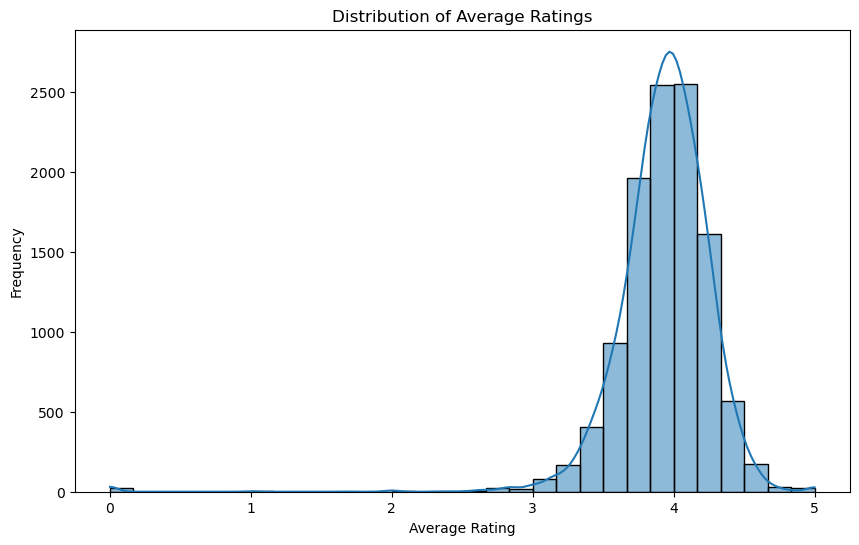

In [21]:
#Distribution of Average Ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(goodreads['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


### Interpretation:
This histogram with a kernel density estimate (KDE) overlay shows the distribution of average ratings for books. The distribution is skewed toward higher ratings, with a peak around 4. This could suggest that either readers tend to rate books favorably or that the dataset contains a higher proportion of well-regarded books.

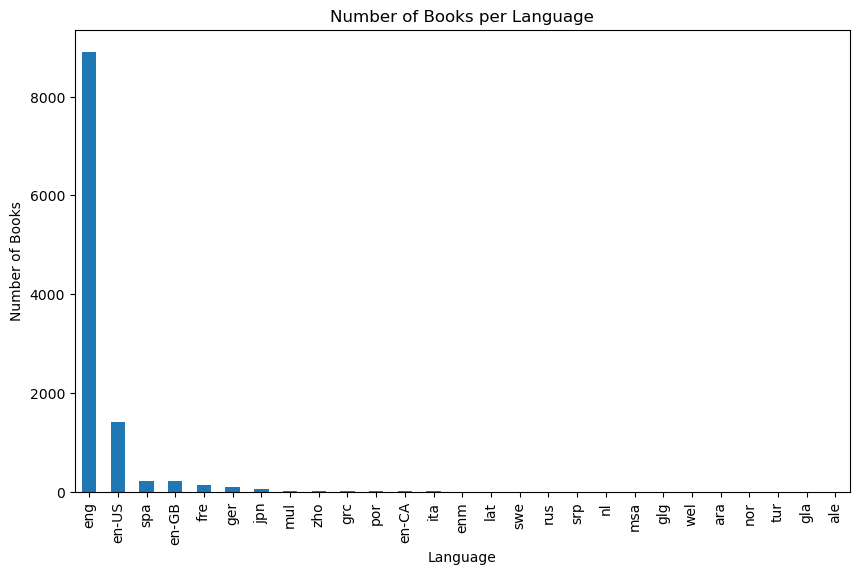

In [22]:
 #Number of Books per Language
language_counts = goodreads['language_code'].value_counts()
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Number of Books per Language')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.show()


### Interpretation:
This bar chart shows the number of books categorized by language. English (eng) has by far the most books, dwarfing all other languages. This suggests that the dataset is predominantly composed of English-language books, which could reflect the source of the data or the focus of the data collection.

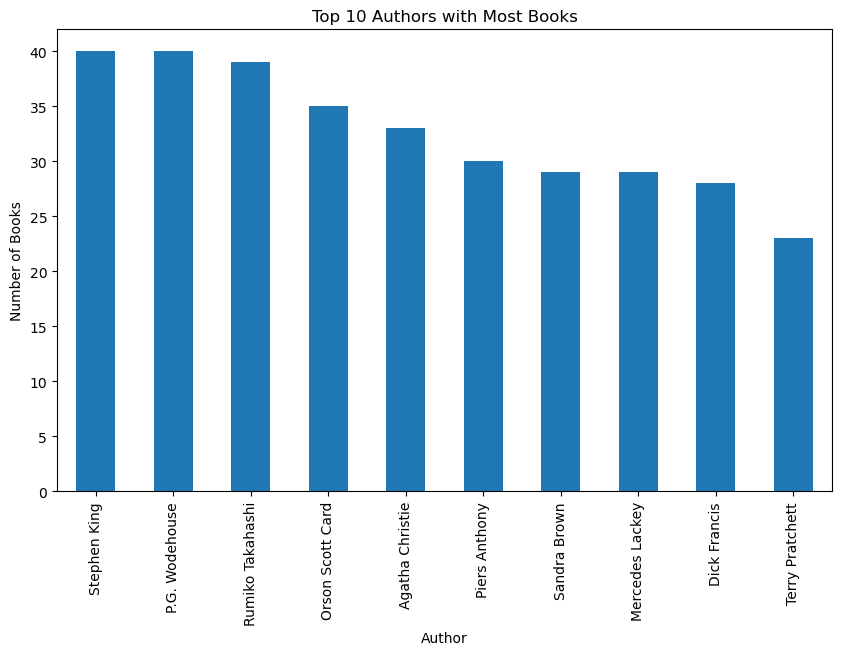

In [23]:
#Top 10 Authors with Most Books
top_authors = goodreads['authors'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()


### Interpretation:
The bar chart displays the top 10 authors by the number of books authored. Stephen King is the most prolific author among those listed, with a slight lead over P.G. Wodehouse and Rumiko Takahashi. The chart indicates which authors have the largest number of published works in the dataset, which may correlate to popularity or prolific writing.

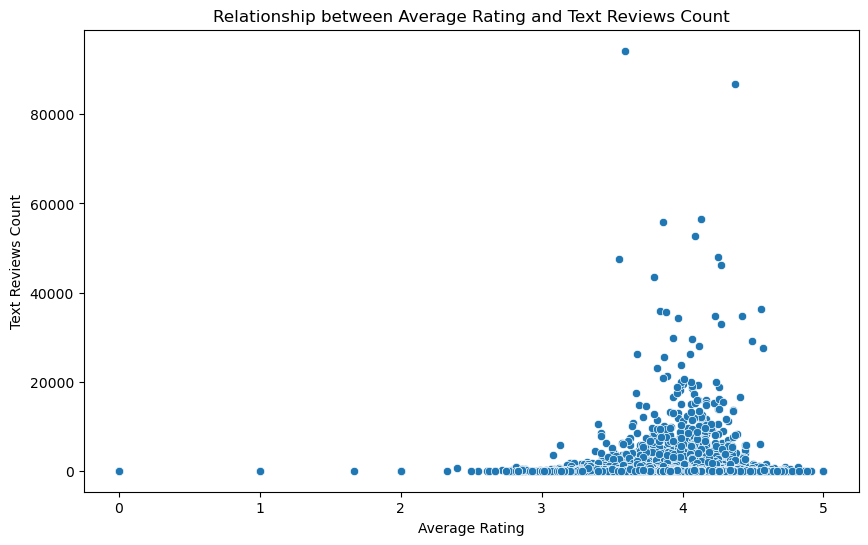

In [24]:
# Relationship between Ratings and Review Counts
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rating', y='text_reviews_count', data=goodreads)
plt.title('Relationship between Average Rating and Text Reviews Count')
plt.xlabel('Average Rating')
plt.ylabel('Text Reviews Count')
plt.show()


### Interpretation:
This scatter plot explores the relationship between the average rating of books and the number of text reviews they received. There seems to be a positive correlation where books with higher average ratings also tend to have more text reviews. This could suggest that better-rated books receive more engagement in terms of text reviews, or it could indicate a tendency for readers to review books they like more.

In [26]:
print(goodreads.columns)


Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')


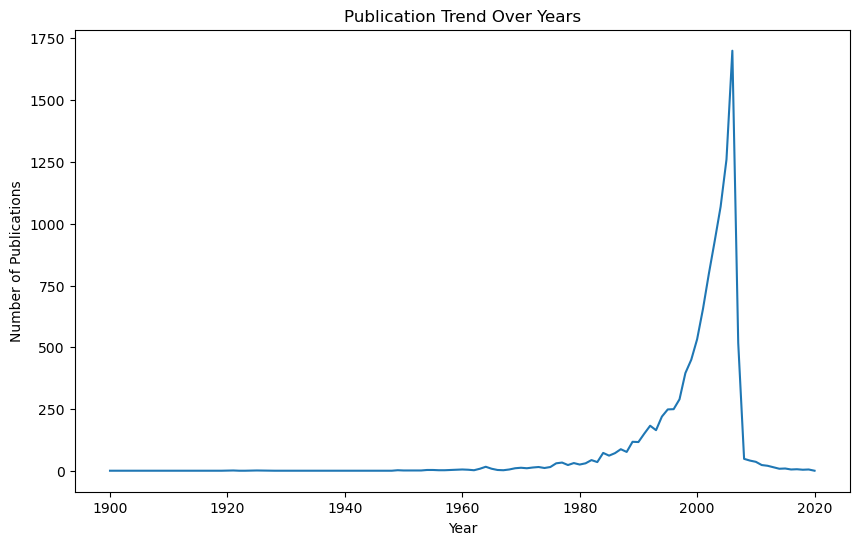

In [29]:
#Publication Trends Over Time
goodreads['year'] = goodreads['publication_date'].dt.year
publications_per_year = goodreads.groupby('year').size()
plt.figure(figsize=(10, 6))
publications_per_year.plot()
plt.title('Publication Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.show()


### Interpretation:

The line chart depicts the trend of book publications over the years. There's a significant spike in the number of publications around the year 2000, which could indicate a data entry issue, an actual increase in publications due to factors like technological advancements in publishing, or the dataset containing many recent publications. The trend requires further investigation to understand the reason behind the spike.

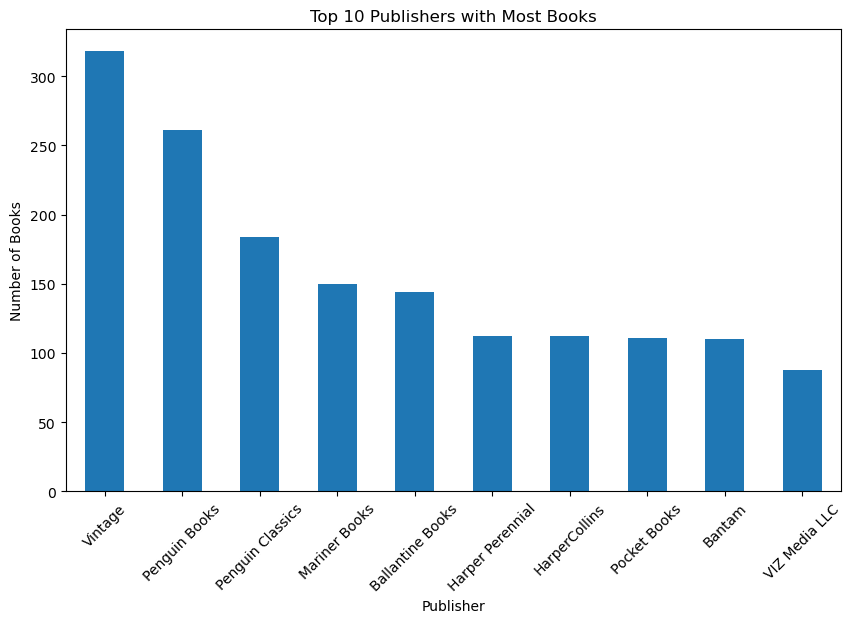

In [30]:
#Publisher Analysis
top_publishers = goodreads['publisher'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='bar')
plt.title('Top 10 Publishers with Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


### Interpretation:
This bar chart shows the top 10 publishers ranked by the number of books published. The publisher 'Vintage' appears to have published the most books within this dataset, followed by 'Penguin Books' and 'Penguin Classics'. These publishers are dominant in terms of the number of books published compared to others.

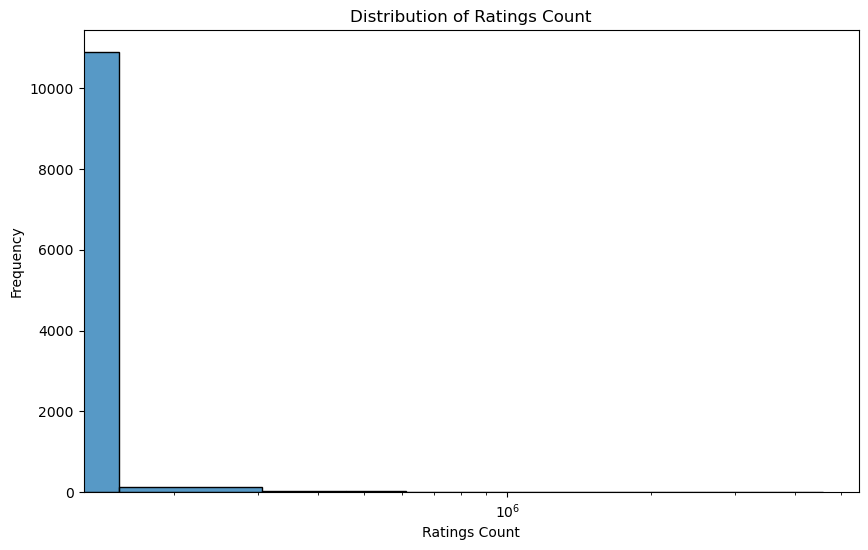

In [32]:
#Analysis of Ratings Count
plt.figure(figsize=(10, 6))
sns.histplot(goodreads['ratings_count'], bins=30, kde=False)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.xscale('log') # Using a log scale due to wide range of values
plt.show()


### Interpretation:
This histogram shows the distribution of the ratings count on a logarithmic scale due to the wide range of values. The majority of books have a low number of ratings, as indicated by the tall bar on the far left. There are very few books with a high number of ratings, which tail off to the right, indicating a long-tail distribution. This is typical of rating data where many items have few ratings, while a small number have many.

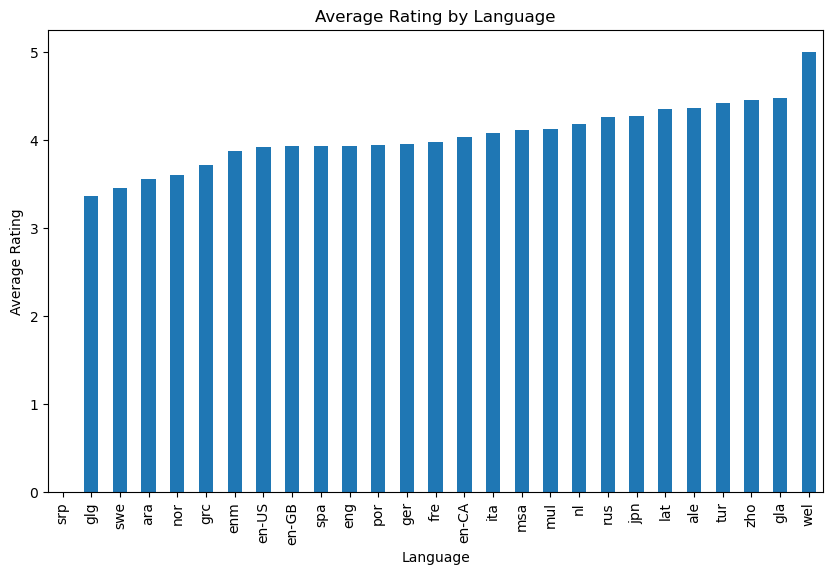

In [33]:
#Average Rating by Language
avg_rating_by_lang = goodreads.groupby('language_code')['average_rating'].mean()
plt.figure(figsize=(10, 6))
avg_rating_by_lang.sort_values().plot(kind='bar')
plt.title('Average Rating by Language')
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.show()


### Interpretation:
This bar chart illustrates the average book rating for each language. It seems that all languages have relatively high average ratings, generally above 3.5, with slight variations between them. Languages on the right side of the chart, like Welsh ('wel'), have the highest average ratings, which could suggest that books in these languages are highly rated, though it's also possible that there are fewer books in those languages skewing the average.

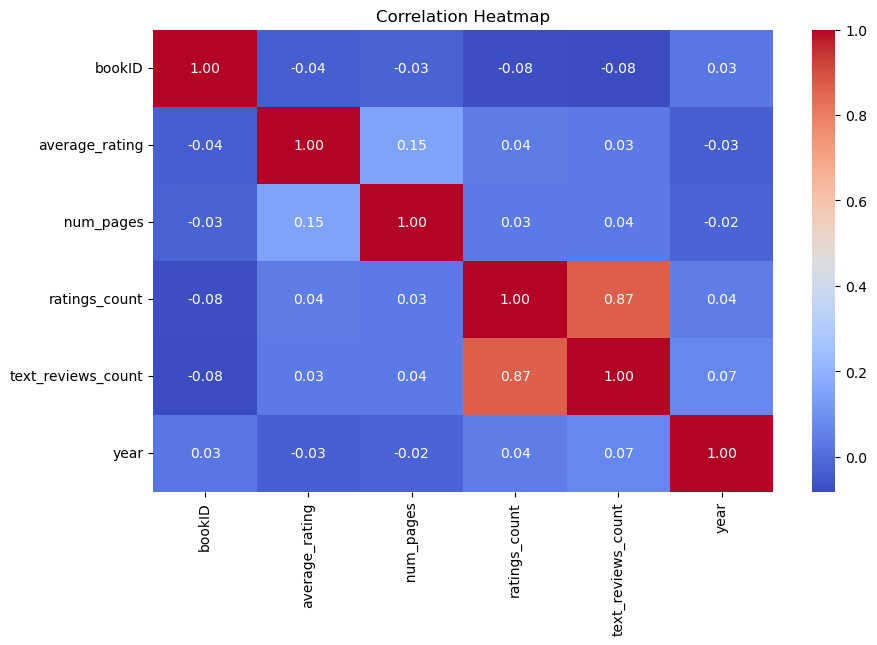

In [34]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(goodreads.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Interpretation 
The heatmap shows the correlation coefficients between different numeric variables in the dataset. A correlation coefficient near 1 or -1 indicates a strong positive or negative correlation, respectively, while a coefficient near 0 indicates no linear correlation. Here, we see a strong positive correlation between ratings_count and text_reviews_count, suggesting that books with more ratings tend to have more text reviews. The other variables show little to no correlation with each other.

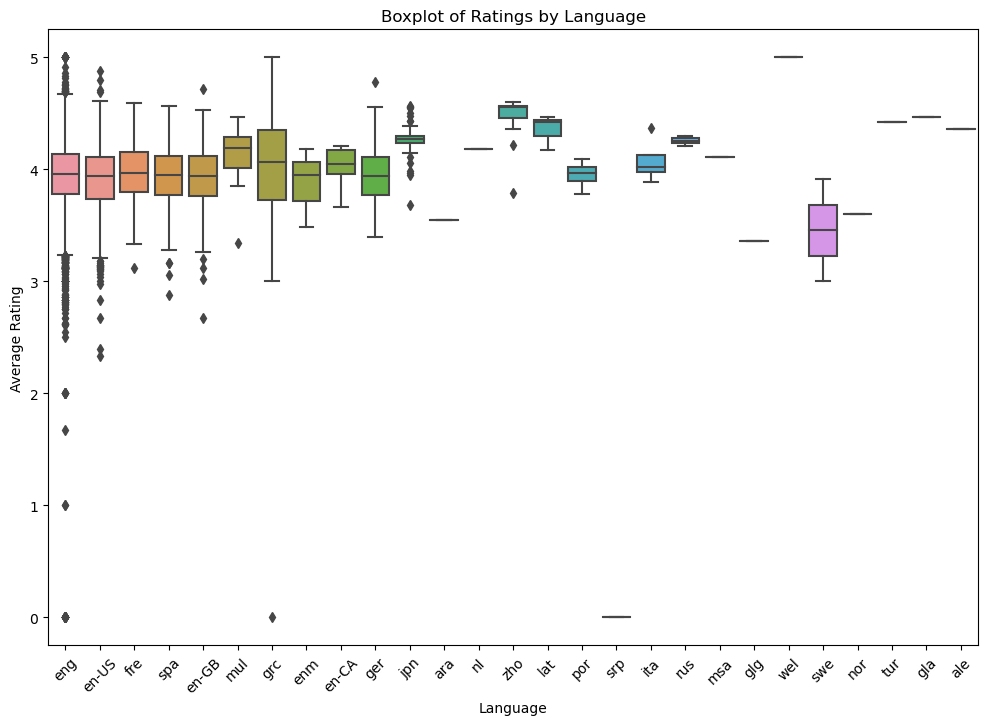

In [35]:
#Boxplot of Ratings by Language
plt.figure(figsize=(12, 8))
sns.boxplot(x='language_code', y='average_rating', data=goodreads)
plt.title('Boxplot of Ratings by Language')
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


### Interpretation:
This boxplot displays the distribution of average ratings for books across different languages. The central line in each box represents the median rating, while the box edges represent the 25th and 75th percentiles. Points outside the 'whiskers' are outliers. The variability in ratings can be compared across languages. Some languages appear to have a wide range of ratings, while others are more concentrated. This chart is useful for seeing how ratings differ by language and identifying languages with unusually high or low ratings.